In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
wine = load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print(df.head())
print(df.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state= 42
)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [4]:
# стандартизуємо
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# словник для результатів
results = {}

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)
y_pred_knn = knn.predict(X_test_scaler)
results['KNN'] = accuracy_score(y_test,y_pred_knn)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaler,y_train)
y_pred_nb = nb.predict(X_test_scaler)
results['Navie Bayes'] = accuracy_score(y_test,y_pred_nb)

# SVM
svm = SVC(kernel = 'linear',C=1)
svm.fit(X_train_scaler,y_train)
y_pred_svm = svm.predict(X_test_scaler)
results['SVM'] = accuracy_score(y_test,y_pred_svm)

# виведемо
for model, acc in results.items():
    print(f"{model}: accuracy = {acc:.4f}")

KNN: accuracy = 0.9444
Navie Bayes: accuracy = 1.0000
SVM: accuracy = 0.9722


{'KNN': 0.9444444444444444, 'Navie Bayes': 1.0, 'SVM': 0.9722222222222222}


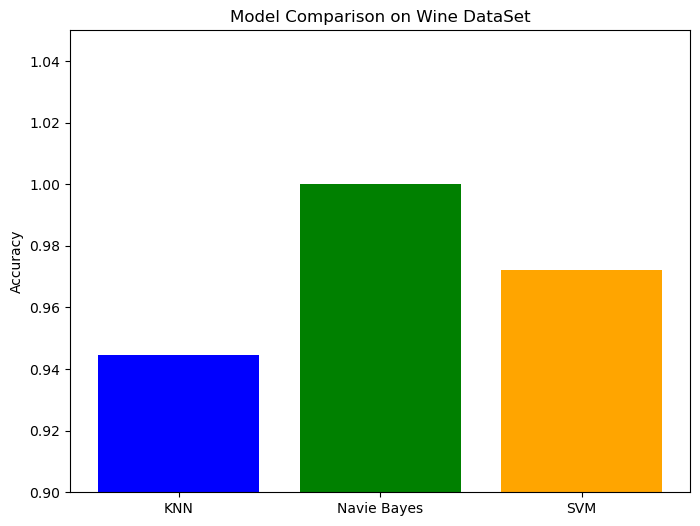

In [5]:
results_df = pd.DataFrame(list(results.items()),columns= ['Model','Accuracy'])
print(results)

plt.figure(figsize=(8,6))
plt.bar(results_df['Model'].values,results_df['Accuracy'].values, color = ['blue','green','orange'])
plt.ylabel('Accuracy')
plt.ylim(0.9,1.05)
plt.title("Model Comparison on Wine DataSet")
plt.show()

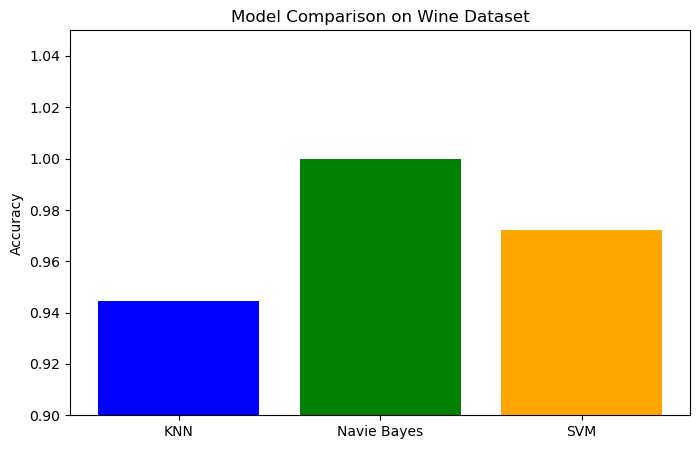

In [6]:
results = {'KNN':0.9444,'Navie Bayes': 1.0, 'SVM': 0.9722}

df_results = pd.DataFrame(list(results.items()), columns=['Model','Accuracy'])

plt.figure(figsize=(8,5))
plt.bar(df_results['Model'], df_results['Accuracy'], color = ['blue','green','orange'])
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.05)
plt.title('Model Comparison on Wine Dataset')
plt.show()

In [7]:
### Висновок
- Найкращу точність показав Naive Bayes (100%), але це може бути ознакою **overfitting** або ідеально підходить під розподіл даних.
- SVM — дуже хороша якість (97%), підходить для складніших випадків.
- KNN — теж непогано (94%), але трохи гірше за інші.
Рекомендація: для цього датасету Naive Bayes виглядає оптимально, але треба перевіряти на крос-валідації.

SyntaxError: invalid character '—' (U+2014) (2873346809.py, line 3)

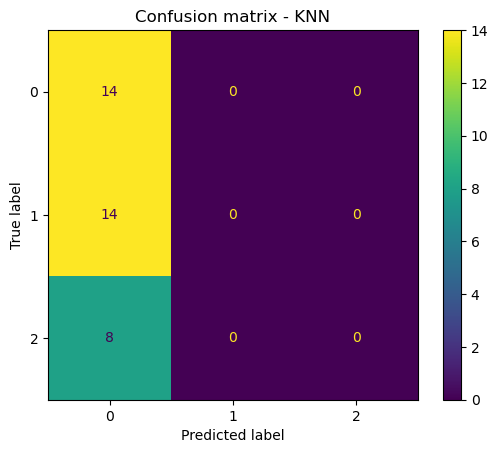

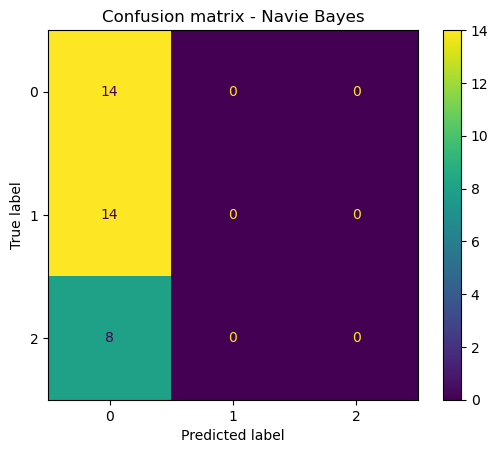

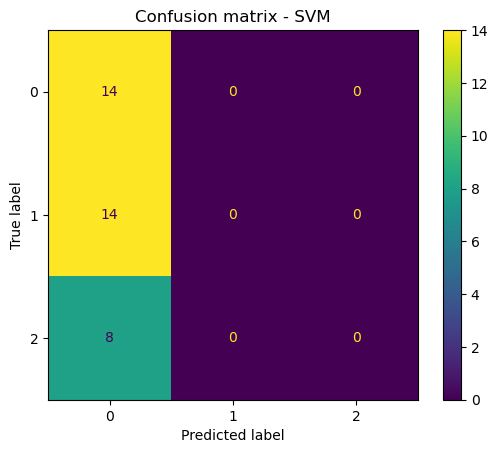

In [8]:
models = {
    'KNN': knn,
    'Navie Bayes': nb,
    'SVM': svm    
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion matrix - {name}")
    plt.show
    
    

In [13]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', C=1)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"📊 {name}:")
    print(f"   mean accuracy = {scores.mean():.4f}")
    print(f"   std deviation = {scores.std():.4f}")
    print(f"   all scores    = {scores}\n")

📊 KNN:
   mean accuracy = 0.6913
   std deviation = 0.0488
   all scores    = [0.72222222 0.66666667 0.63888889 0.65714286 0.77142857]

📊 Naive Bayes:
   mean accuracy = 0.9663
   std deviation = 0.0211
   all scores    = [0.94444444 0.97222222 0.97222222 0.94285714 1.        ]

📊 SVM:
   mean accuracy = 0.9611
   std deviation = 0.0416
   all scores    = [0.88888889 0.94444444 0.97222222 1.         1.        ]

